In [36]:
import numpy
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%run fdtools.py
hbar=1.05e-34
m=9.10e-31
a=2.0

The schrodinger equation helps describes the motions of a particle. In totality the schrodinger equation is written as the following:

$$ i\hbar\frac{\partial}{\partial t}\Psi(\vec{r},t) = -\frac{\hbar^2}{2m}\nabla^2\Psi(\vec{r},t) + V(\vec{r},t)\Psi(\vec{r},t)$$

Where $V(\vec{r}, t)$ is the potential function and we want to solve for $\Psi(\vec{r}, t).$ We will not be solving the full schrodinger equation, but instead we start the time indepedent schrodinger equation and move towards the time dependent schrodinger for a particle in 1D. We will also vary the potential function throughout the notebook. 

# One Dimensional Time Independent Schrodinger Equation (TISE)

The most basic form of the schrodinger equations is 

$$ \frac{-\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$

when V(x) = 0 then

$$ \frac{-\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} = E\psi(x) $$

The potential is defined as the following

![caption](square-well.png) 
WLOG we can shift the potential well to 0 to a.


## EigenProblem Approach

Since V(x) = 0 for 0 to a 

$$ \frac{-\hbar}{2m}\frac{\partial^2}{\partial x^2} \psi(x) = E\psi(x) $$

$$ \frac{\partial^2}{\partial x^2}\psi(x) = \frac{-2mE}{\hbar^2}\psi(x)$$

Discretize $\frac{\partial^2}{\partial x^2}$ to get 

$$ \begin{bmatrix} 
 &&  &&\\
 && D &&\\
 &&  &&\\
 \end{bmatrix}\psi(x) = \lambda \psi(x) $$
 
This is our eigenfunction problem. After discretizing the differential operator, we can solve for the eigenvalues - energy values $\frac{-2mE}{\hbar^2}$ - and the eigenvectors - the wave functions. 


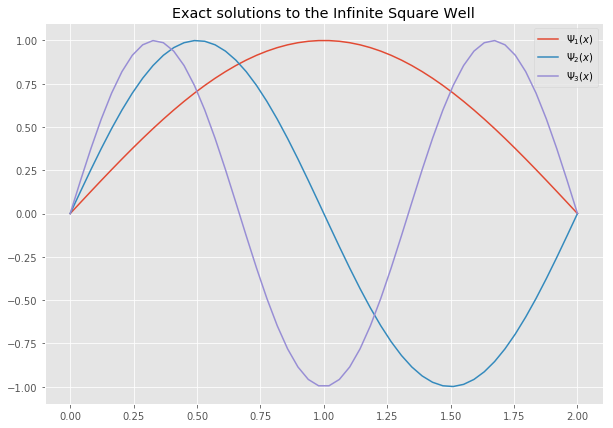

In [37]:
def TISE_InfSqrWell(x,l,n):
    #solution to the infinite well from 0 to l
    return numpy.sqrt(2.0/l) * numpy.sin((n*numpy.pi*x)/l)
x = numpy.linspace(0,a)
plt.figure(figsize=(10,7))
plt.title('Exact solutions to the Infinite Square Well')
for i in range(1,4):
    u = TISE_InfSqrWell(x, a, i)
    plt.plot(x,u, label="$\Psi_{}(x)$".format(i))
plt.legend(bbox_to_anchor=(1,1));

In [38]:
def TISE_laplacian(a,N, S=[1, -2, 1], c=lambda h: 1/(h^2)):
    x = numpy.linspace(0,a,N)
    h = x[1]-x[0]
    ddx = numpy.zeros((N,N))
    S_position = numpy.arange(-len(S)//2 + 1, len(S)//2+1)
    for i, Si in zip(S_position, S):
        ddx += Si*numpy.diag(numpy.ones(N - abs(i)), i)
    H = c(h)*ddx
    E,psi = numpy.linalg.eigh(H) 
    return x,E,psi.T/numpy.sqrt(h)


We can use any stencil, so we'll use the one found [here](https://en.wikipedia.org/wiki/Five-point_stencil) 

$$(12h^2)^{-1} \begin{bmatrix} -1 && 16 && -30 && 16 && -1 \end{bmatrix}$$.

In [39]:
N = 256
x, E, psi = TISE_laplacian(a,N, S=[-1, 16, -30, 16, -1], c=lambda h:(1/(12*h**2)))
energy_values = (-hbar**2*E)/(2*m)

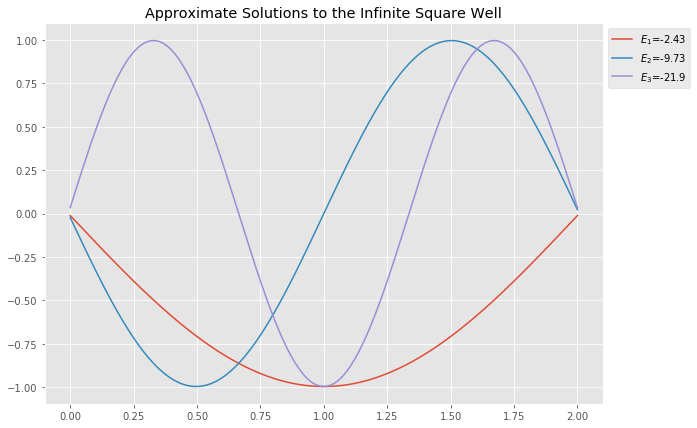

In [40]:
plt.figure(figsize=(10,7))
plt.title("Approximate Solutions to the Infinite Square Well")
for i in range(1,4):
    #going from the smaller eigen values to the larger values means incrementing backwards
    plt.plot(x,psi[-i], label="$E_{}$={:.3}".format(i,E[-i]))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

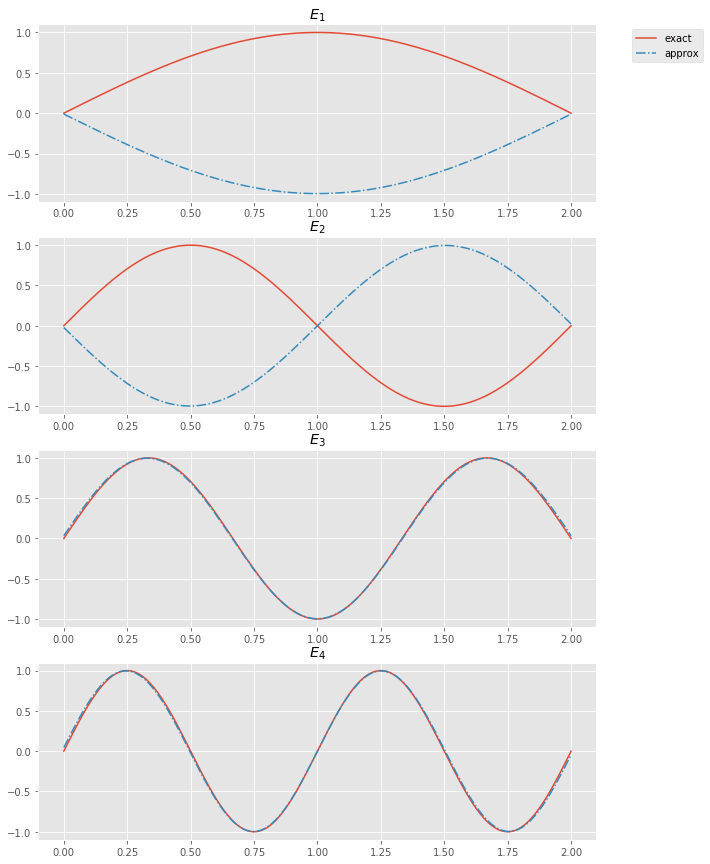

In [41]:
# Here are some examples of the solutions to the eigen function using the given stencil.
plt.figure(figsize=(10,15))
for i in range(1,5):
    plt.subplot(410 + i)
    plt.title("$E_{}$".format(i))
    u = TISE_InfSqrWell(x, a, i)
    plt.plot(x,u, label='exact')
    plt.plot(x,psi[-i], '-.', label='approx')
plt.legend(bbox_to_anchor=(1.2, 4.6));

Here are some of the eigenvalues

In [42]:
for i in range(1,5):
    print('E_{} = {}'.format(i, E[-i]))

E_1 = -2.4320743549350654
E_2 = -9.728295884126092
E_3 = -21.888659764437694
E_4 = -38.91315723590306


Although these are not our energy values. Since we moved $\frac{-\hbar}{2m}$ to the right side of the equation, our eigenvalues are actually $\frac{-2mE}{\hbar}$. Here are the energy values:

In [43]:
for i in range(1,5):
    print('E_{} = {}'.format(i,energy_values[-i]))

E_1 = 1.4732758111625878e-38
E_2 = 5.893102314422537e-38
E_3 = 1.3259476588072835e-37
E_4 = 2.3572393325595123e-37


While some of these functions match accordingly, others look "flipped". This is because of the phase angle in the complex plane. Here we are graphing the reals and choosing one of two choices for the phase. If the phase happens to match up to the one calculated by numpy, then $\Psi(x)$ will agree with our discretization, otherwise the graphs look "flipped".

Although, there is little physical meaning with $\Psi(x)$. Instead, we can graph $\Psi(x)^2$. This gives us our probability amplitude function. We'll plot a few examples of $\Psi(x)^2$ and see that it agrees, at least visually, fairly well with our method.

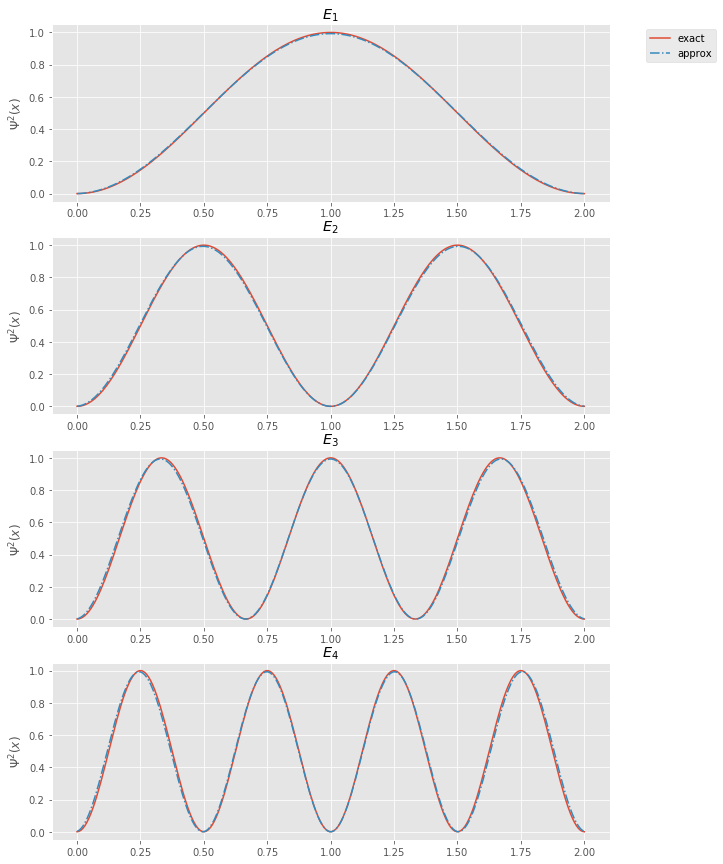

In [44]:
plt.figure(figsize=(10,15))
for i in range(1,5):
    plt.subplot(410 + i)
    plt.title("$E_{}$".format(i))
    plt.ylabel(r'$\Psi^2(x)$')
    u = TISE_InfSqrWell(x, a, i)
    plt.plot(x,u**2, label='exact')
    plt.plot(x,psi[-i]**2, '-.', label='approx')
plt.legend(bbox_to_anchor=(1.2, 4.6));

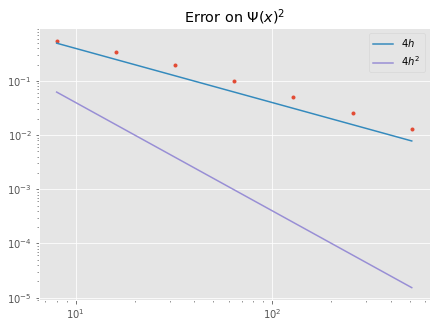

In [45]:
hs = 2**numpy.arange(3,10)
error = []
n = 3
plt.figure(figsize=(7,5))
plt.title('Error on $\Psi(x)^2$')
for N in hs:
    x, E, psi = TISE_laplacian(a, N, S=[-1, 16, -30, 16, -1], c=lambda h:(1/(12*h**2)))
    u = TISE_InfSqrWell(x, a, n)
    error.append(numpy.linalg.norm(u**2 - psi[-n]**2, ord=numpy.inf))
plt.loglog(hs, error, '.')
plt.loglog(hs, 4*(1/hs), label='$4h$')
plt.loglog(hs, 4*(1/hs)**2, label='$4h^2$')
plt.legend(bbox_to_anchor=(1,1));

# TISE - Runge-Kutta Methods

Let's try a different method of solving ODE's. First, consider our TISE in a infinite potential 

$$ \frac{-\hbar}{2m}\frac{\partial^2}{\partial x^2}\psi(x) = E\psi(x) $$

$$ \psi(0) = \psi(a) = 0 $$ 

We can try and use a Runge-Kutta Method to solve this. First we need to perform substiutions to create a system of first order ODE's instead. 

$$ \text{ Let } \phi = \psi_x $$

Now we can write the above equation as 

$$ \begin{bmatrix} \psi \\ \phi \end{bmatrix}_x = \begin{bmatrix} \phi \\ \frac{-2mE}{\hbar^2}\psi \end{bmatrix} $$

$$ \psi(0) = 0 \quad \text{ and } \quad \phi(0) = \frac{n\pi}{a} \sqrt{\frac{2}{a}} $$

Although, it should be noted that since we know the exact solution before hand, we can calculate the derivative function and plug in the exact starting slope $\phi(0)$.

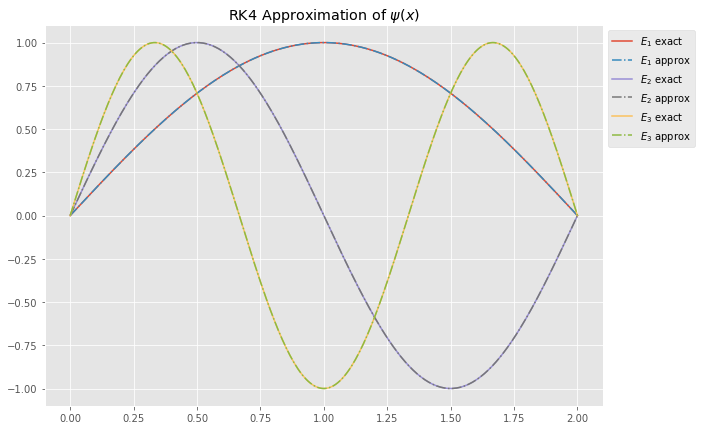

In [231]:
class TISE:
    def __init__(self,E):
        self.E = E
    def f(self,t,u):
        return numpy.array([u[1], u[0]*(-2*m*self.E)/(hbar**2)])

def E(n, a):
    return (n*n*numpy.pi*numpy.pi*hbar*hbar)/(2*m*a*a)

def TISE_rkexplicit(f, u0, butcher=None, tfinal=1, h=.1):
    if butcher is None:
        A, b = rk_butcher_4()
    else:
        A, b = butcher
    c = numpy.sum(A, axis=1)
    s = len(c)
    u = u0.copy()
    t = 0
    hist = [(t,u0)]
    while t < tfinal:
        if tfinal - t < 1.01*h:
            h = tfinal - t
            tnext = tfinal
        else:
            tnext = t + h
        h = min(h, tfinal - t)
        fY = numpy.zeros((len(u0), s))
        for i in range(s):
            Yi = u.copy()
            for j in range(i):
                Yi += h * A[i,j] * fY[:,j]
            fY[:,i] = f(t + h*c[i], Yi)
        u += h * fY.dot(b)
        t = tnext
        hist.append((t, u.copy()))
    return hist

N = 256
plt.figure(figsize=(10,7))
plt.title("RK4 Approximation of $\psi(x)$")
for i in range(1,4):
    Ei = E(i,a)
    h = (a/N)
    waves = TISE(Ei)
    u0 = numpy.array([0, ((i*numpy.pi)/a)*numpy.sqrt(2.0/a)])
    hist = TISE_rkexplicit(waves.f, u0, tfinal=a, h = h)
    x = numpy.array([x for x,u in hist])
    psi = numpy.array([u[0] for x,u in hist])
    u = TISE_InfSqrWell(x, a, i)
    plt.plot(x, u, label="$E_{}$ exact".format(i))
    plt.plot(x, psi, '-.',label="$E_{}$ approx".format(i))
plt.legend(bbox_to_anchor=(1,1));

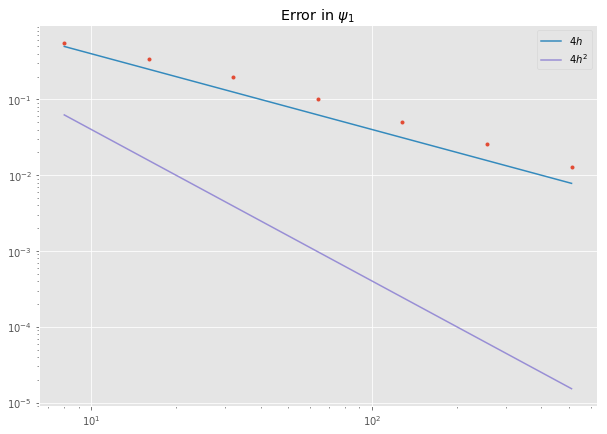

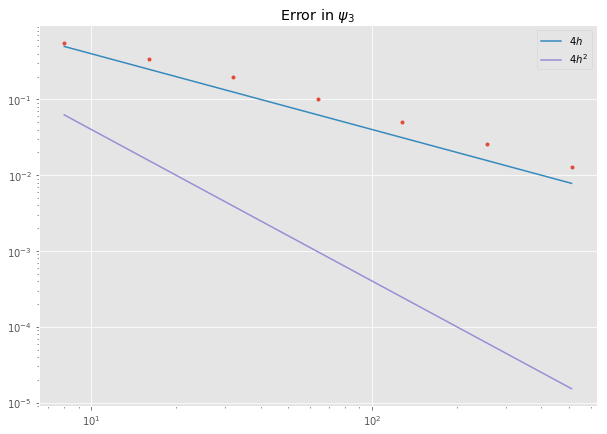

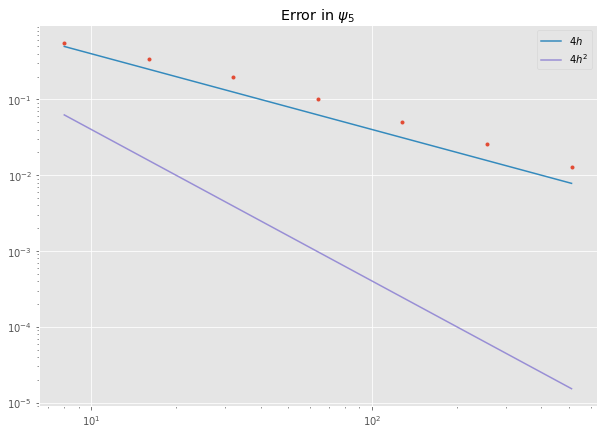

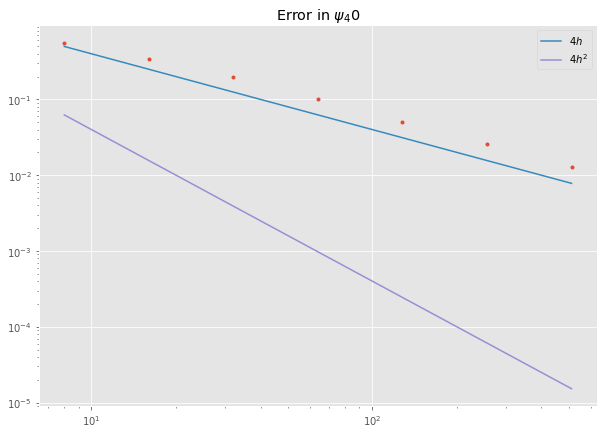

In [63]:
for n in [1,3,5, 40]:
    err = []
    for N in 2**numpy.arange(3,10):
        Ei = E(n, a)
        waves = TISE(Ei)
        h = (a/N)
        u0 = numpy.array([0,(i*numpy.pi*numpy.sqrt(2.0/a))/a])
        hist = TISE_rkexplicit(waves.f, u0, tfinal=a, h=h)
        x = numpy.array([x for x,u in hist])
        psi = numpy.array([u[0] for x,u in hist])
        psi_exact = TISE_InfSqrWell(x, a, n)
        err.append(numpy.linalg.norm(psi - psi_exact))
    plt.figure(figsize=(10,7))
    plt.title('Error in $\psi_{}$'.format(n))
    plt.loglog(hs, error, '.')
    plt.loglog(hs, 4*(1/hs), label='$4h$')
    plt.loglog(hs, 4*(1/hs)**2, label='$4h^2$')
    plt.legend(loc='upper right')

This is a method that is at least first-order accurate for any function $\psi_n(x)$. Let's add back a potential function now.

## TISE with a Finite Potential Well

$$$$

We will now consider what happens when V(x) $\neq$ 0. First, let's rewrite the schrodinger equation: 

$$\frac{-\hbar^2}{2m}\frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x) = E\Psi(x) $$

This is similar to the infinite potential well. We can solve this problem as another eigenproblem. If discretize $\frac{\partial^2}{\partial x^2}$ and also discretize the potential function, then we will have $H\psi(x) = E\psi(x)$

In [226]:
def TISE_laplacian_finite_well(a,N,V, S=[1.0, -2.0, 1.0], c=lambda h: 1/(h**2.0)):
    x = numpy.linspace(-a,a,N)
    h = x[1]-x[0]
    ddx = numpy.zeros((N,N))
    S_position = numpy.arange(-len(S)//2 + 1, len(S)//2+1)
    for i, Si in zip(S_position, S):
        ddx += Si*numpy.diag(numpy.ones(N - abs(i)), i)
    #multipled the constant through ddx this time.
    H = (-hbar**2.0/(2.0*m))*c(h)*ddx + numpy.diag(V)
    E,psi = numpy.linalg.eigh(H) 
    return x,E,psi.T/numpy.sqrt(h)

def V_step(V0, x, xrange = None):
    V = numpy.zeros(len(x))
    for i, xi in enumerate(x):
        if(xrange is None):
            if(xi < x[0]/2 or xi > x[-1]/2):
                V[i] = V0
        else:
            if(xi < xrange[0] or xi>xrange[1]):
                V[i] = V0
    return V

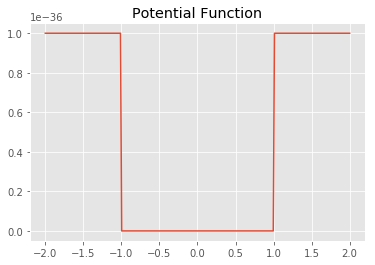

In [227]:
#if V0 is too high compared to the energy values, then we won't see the affect
V0 = 1e-36
N = 256
x = numpy.linspace(-a,a,N)
V = V_step(V0, x)
plt.title('Potential Function')
plt.plot(x, V)
x, E, psi = TISE_laplacian_finite_well(a, N, V)
max_E = max(E)

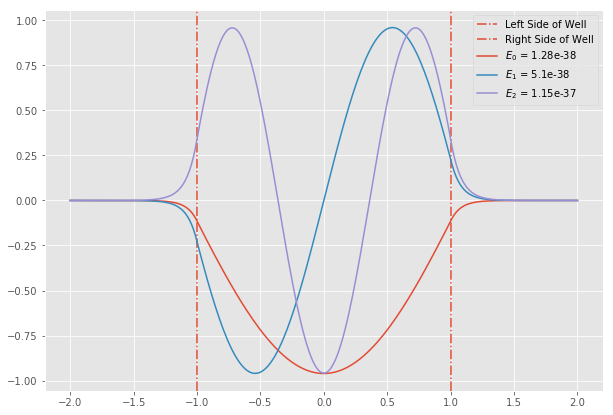

In [228]:
plt.figure(figsize=(10,7))
plt.axvline(x=-a/2,label='Left Side of Well', linestyle='-.')
plt.axvline(x=a/2,label='Right Side of Well', linestyle='-.')
plt.plot(x, psi[0], label='$E_{}$ = {:.3}'.format(0, E[0]))
plt.plot(x, psi[1], label='$E_{}$ = {:.3}'.format(1, E[1]))
plt.plot(x, psi[2], label='$E_{}$ = {:.3}'.format(2, E[2]))
plt.legend(bbox_to_anchor=(1,1))

Let's look at what happens when we vary the value of V. We'll graph $\psi^2(x)$ because we still have the phase problem from earlier. But $\psi^2(x)$ is much more physical. $\psi^2(x)$ represents the probability of finding a particle within a specific range. 

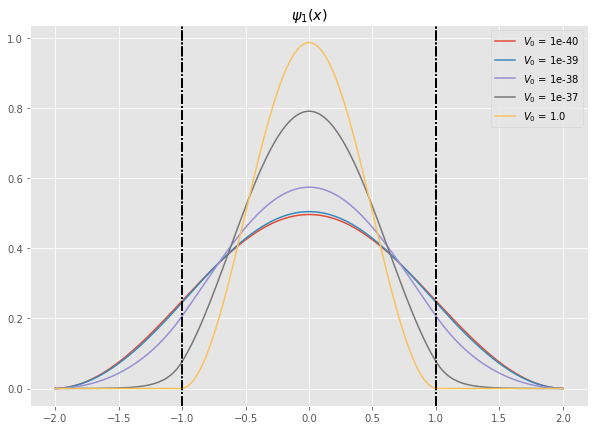

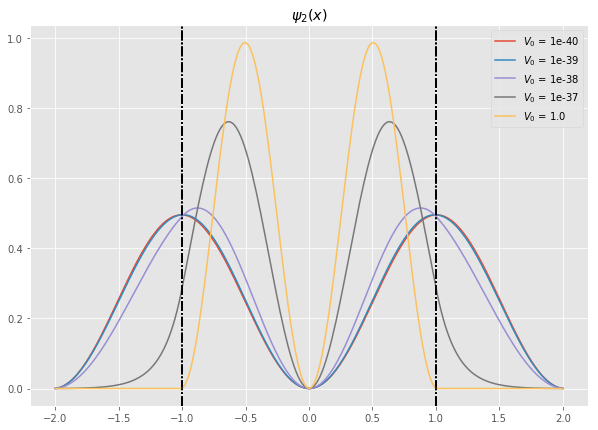

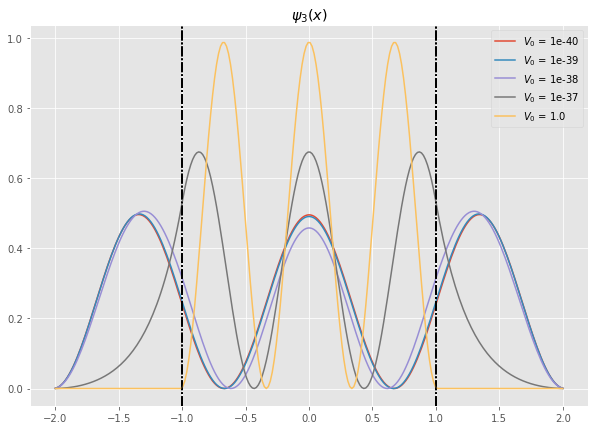

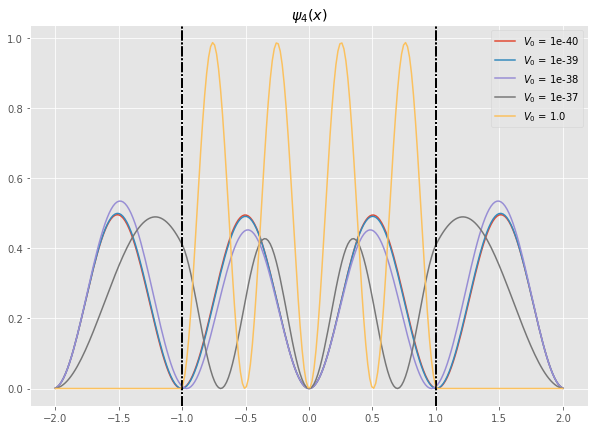

In [229]:
for n in range(0, 4):
    plt.figure(figsize=(10,7))
    plt.title('$\psi_{}(x)$'.format(n+1))
    l = 5
    for i in range(0, l):
        factor = 10**(i)
        V0 = (1e-40)*factor
        if(i == l-1):
            V0 = 1.0
        x = numpy.linspace(-a,a,N)
        V = V_step(V0, x)
        x, E, psi = TISE_laplacian_finite_well(a, N, V)
        plt.plot(x, psi[n]**2, label='$V_0$ = {:.3}'.format(V0))
        plt.axvline(x=-a/2, linestyle='-.', color='black')
        plt.axvline(x=a/2, linestyle='-.', color='black')
    plt.legend(bbox_to_anchor=(1,1))

In [230]:
print("The maximum energy level is {:.3} which is much less than 1.0".format(max_E)) 

The maximum energy level is 9.94e-35 which is much less than 1.0


As the potential function increases the probability that a particle can be found outside the well decreases. As the potential function becomes much greater than E, then the  equation looks like the infinite potential well. 

# 1D Time Dependent Schrodinger Equation (TDSE)

The full schrodinger equation has components that are dependent on time. The full Schrodinger equation in 1D is 

$$ i\hbar\frac{\partial \Psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m}\frac{\partial^2 \Psi(x,t)}{\partial x^2} + V(x)\Psi(x,t) $$

Where are boundary conditions are now 

$$ \psi(a,t) = \psi(b,t) = 0 \quad \psi(x,0) = g(x) $$

and $a,b$ are the bounds. Also, we need an inital wave function now.

## Crank-Nicolson Method

We'll try the [Crank-Nicolson Method](https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method). 

First, we'll rearrange the equation a bit:
$$ \frac{\partial \Psi(x,t)}{\partial t} = \frac{i\hbar}{2m}\frac{\partial^2 \Psi(x,t)}{\partial x^2} - \frac{iV(x)}{\hbar}\Psi(x,t) $$

We will use $\Psi^k_j = \Psi(a + j*h, \tau*k)$ be how we index the solution to the equation. Here a is the left hand boundary, j is the jth step in x, h is the grid size of x, k is the kth step in time, and $\tau$ is the grid size of t . 

This method uses a finite difference technique to replace the above equation with stencils. Using the new indexing of the $\Psi$, let's rewrite both sides of the equation as a finite difference method. First the right hand side of the equation becomes:

$$\frac{i\hbar}{2m}\frac{\partial^2 \Psi(x,t)}{\partial x^2} - \frac{iV(x)}{\hbar}\Psi(x,t) = \frac{i\hbar}{2m} \frac{1}{h^2} \big (\Psi^k_{j-1} - 2\Psi^k_{j} + \Psi^k_{j+1} \big ) - \frac{iV(a + jh)}{\hbar} \Psi^k_i $$

Create an operator $\hat{H}$ such that:

$$ \hat{H} = \alpha\begin{bmatrix} &&  &&\\ && D^2 &&\\ &&  &&\\ \end{bmatrix} + \beta\begin{bmatrix} &&  &&\\ && V^k &&\\ &&  &&\\ \end{bmatrix}$$

where $\alpha$ and $\beta$ are the constants of the equation and this changes the equation into 

$$\frac{i\hbar}{2m}\frac{\partial^2 \Psi(x,t)}{\partial x^2} - \frac{iV(x)}{\hbar}\Psi(x,t) = i\hat{H}$$

Next, the left hand side, a bit simpler, becomes:

$$\frac{\partial \Psi(x,t)}{\partial t} =  \frac{\Psi^{k+1}_j - \Psi^{k}_j}{\tau}$$

with a forward difference method. If we take a backward difference, then the left hand side becomes:

$$\frac{\partial \Psi(x,t)}{\partial t} =   \frac{\Psi^{k}_j - \Psi^{k+1}_j}{\tau}$$

Equating both sides, using the operator $\hat{H}$, we get:

$$(1 + i\hat{H}\tau)\Psi^k = \Psi^{k+1} \quad \text{ and } \quad (1 - i\hat{H}\tau)\Psi^{k+1} = \Psi^k$$

Crank-Nicholson averages these equations such that we get:

$$\Big(1 + \frac{i\hat{H}\tau}{2} \Big)\Psi^{k+1}_j = \Big(1 - \frac{i\hat{H}\tau}{2}\Big)\Psi^k_j$$

We can create two matrices $U_1$ and $U_2$ to solve for the $\Psi$.

In [248]:
def psi0(x, a=1.0, n=1):
    return numpy.sqrt(2.0/a)*numpy.sin((numpy.pi*n*x)/a)

In [314]:
from scipy import sparse
from scipy.sparse import linalg
N = 256
Nt = N//2
x = numpy.linspace(0,a,N)
dx = x[1] - x[0]
t = numpy.linspace(0,5,Nt)
dt = t[1] - t[0]
#vectors to use when creating diagonals
o = numpy.ones((N), complex)
alp = (1j)*dt/(2*dx**2)*o
V = V_step(10, x)


# SET UP U1 #
eta = 1 + ((1j*dt)/2.0)*((2.0)/(dx**2) + V)
diags = numpy.array([-1,0,+1]) # positions of the vectors in the matrix
vecs1 = numpy.array([-alp,eta,-alp])
U1 = sparse.spdiags(vecs1,diags,N,N) # create tridiagonal sparse matrix
U1 = U1.tocsc() # convert to different sparse format needed for further calculation

# SET UP U2 #
gam = 1 - ((1j*dt)/2.0)*((2.0)/(dx**2) + V)
vecs2 = numpy.array([alp, gam, alp])
U2 = sparse.spdiags(vecs2, diags, N, N)
U2 = U2.tocsc()

In [315]:
PSI = numpy.zeros((N,Nt),complex) # J times N array to store all solutions

PSI[:,0] = [psi0(xi, a) for xi in x] # psi(x,0) 

LU = linalg.splu(U1) # compute LU-decomposition of U1

for n in range(0,Nt - 1): # loop over time-steps
    b = U2.dot(PSI[:,n]) # right hand side of eq. (3.9)
    PSI[:,n + 1] = LU.solve(b) # solve system of equations for each time step

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


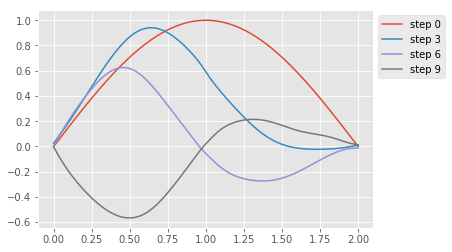

In [316]:
for step in range(0,4):
    plt.plot(x, PSI[:,3*step], label='step {}'.format(3*step))
plt.legend(bbox_to_anchor=(1,1))

Let's make a function out of the above method that depends on the initial conditions of the wave. This will let us explore different variations and what happens over time with the wave equation.

In [343]:
#create a function dependent on initial conditions
def TDSE_CN(h, tau, psi0, V, a=1.0,tfinal=5.0,en=1, V0 = 1):
    '''
    Crank-Nicholson Method for solving the Time Dependent Schrodinger Equation
    
    Returns the wave function Psi(x,t)
    h: step in spacial axis
    tau: step in time axis
    psi0: initial wave function
    V: potential function
    
    a: distance of the spacial grid
        default is 1.0
    tfinal: distance of the time grid
        default is 5.0
    en: energy level which defines psi(x,0)
    '''
    N = int(1/h)
    Nt = int(1/tau)
    x = numpy.linspace(0,a,N)
    t = numpy.linspace(0,tfinal,Nt)
    o = numpy.ones((N), complex)
    alp = (1j)*tau/(2*h**2)*o
    Vx = V(V0, x)
    
    # SET UP U1 #
    eta = 1 + ((1j*tau)/2.0)*((2.0)/(h**2) + Vx)
    diags = numpy.array([-1,0,+1]) # positions of the vectors in the matrix
    vecs1 = numpy.array([-alp,eta,-alp])
    U1 = sparse.spdiags(vecs1,diags,N,N) # create tridiagonal sparse matrix
    U1 = U1.tocsc()
    
    # SET UP U2 #
    gam = 1 - ((1j*tau)/2.0)*((2.0)/(h**2) + Vx)
    vecs2 = numpy.array([alp, gam, alp])
    U2 = sparse.spdiags(vecs2, diags, N, N)
    U2 = U2.tocsc()
    
    # CALCULATE PSI(x,t) #
    PSI = numpy.zeros((N,Nt),complex) # matrix to store solutions
    PSI[:,0] = [psi0(xi, a, en) for xi in x] # psi(x,0) 
    LU = linalg.splu(U1) # compute LU-decomposition of U1
    for n in range(0,Nt - 1): # loop over time-steps
        b = U2.dot(PSI[:,n]) # right hand side of eq. (3.9)
        PSI[:,n + 1] = LU.solve(b) # solve system of equations for each time step
    return x, t, PSI

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


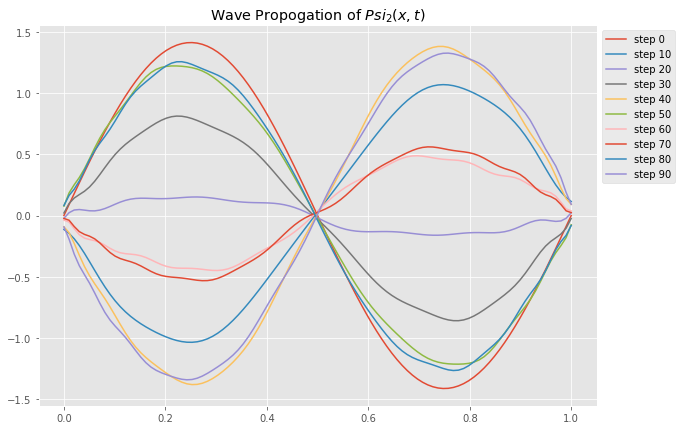

In [345]:
en = 2
x, t, psi = TDSE_CN(.01, .01, psi0, V_step, a=1.0,en=en)
plt.figure(figsize=(10,7))
plt.title('Wave Propogation of $Psi_{}(x,t)$'.format(en))
for step in range(0,10):
    plt.plot(x, psi[:,step], label='step {}'.format(10*step))
plt.legend(bbox_to_anchor=(1,1));